<a href="https://colab.research.google.com/github/boing-86/ML_study/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2022-02-15 05:33:26--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-02-15 05:33:26--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-02-15 05:33:26--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

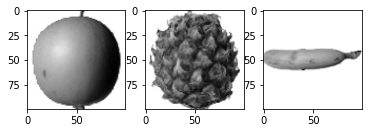

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

fig, axs = plt.subplots(1,3)
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

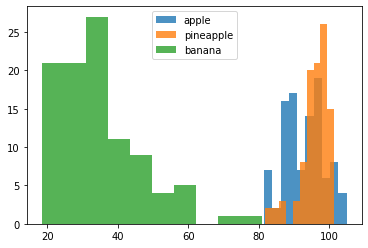

In [4]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

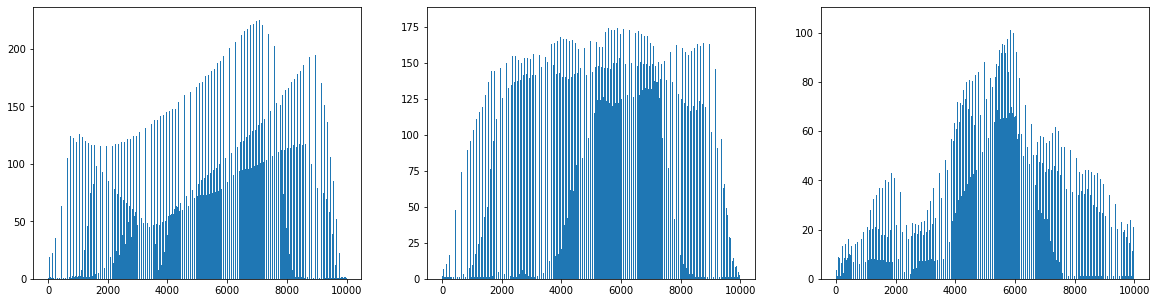

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

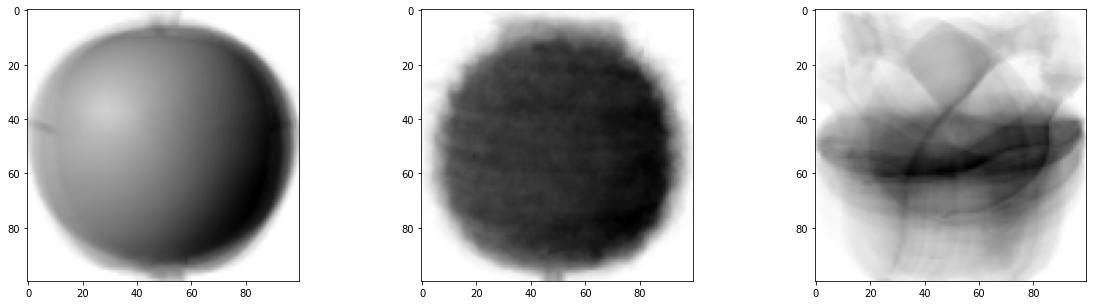

In [40]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

(300,)


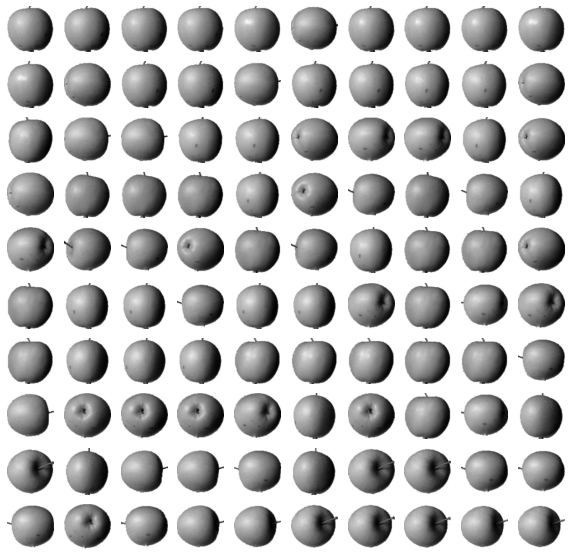

In [42]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fir, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')

plt.show()

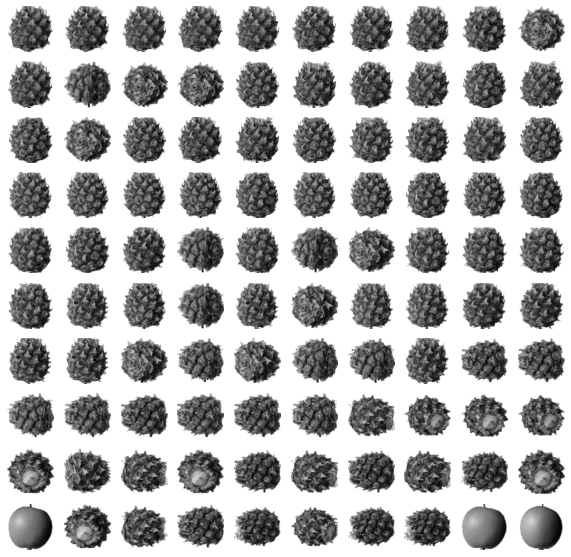

In [46]:
pineapple_abs_diff = np.abs(fruits - pineapple_mean)
pineapple_abs_mean = np.mean(pineapple_abs_diff, axis=(1,2))

pineapple_index = np.argsort(pineapple_abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')

plt.show()

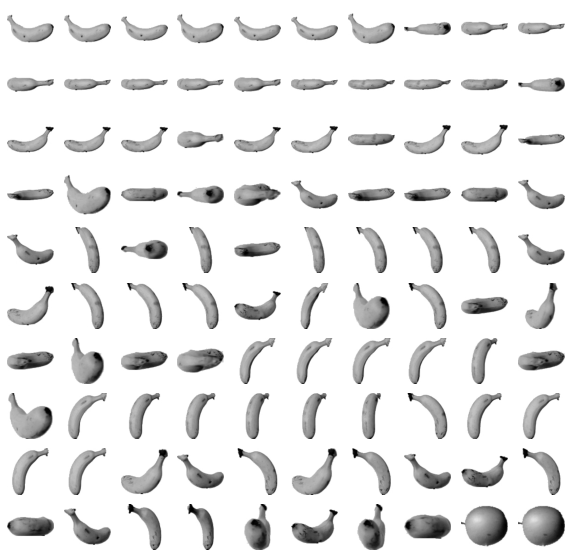

In [47]:
banana_abs_diff = np.abs(fruits - banana_mean)
banana_abs_mean = np.mean(banana_abs_diff, axis=(1,2))

banana_index = np.argsort(banana_abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')

plt.show()

In [6]:
import numpy as np
from sklearn.cluster import KMeans

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [10]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show

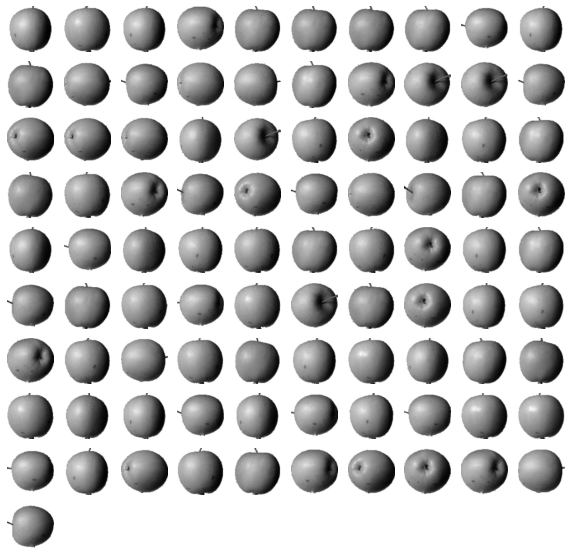

In [61]:
draw_fruits(fruits[km.labels_ == 2])

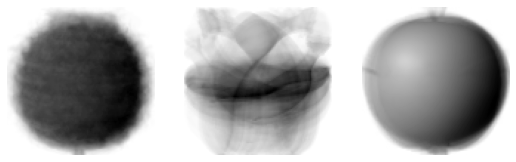

In [62]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

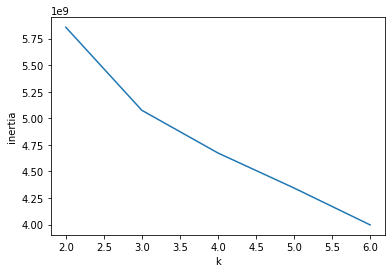

In [66]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2022-02-15 10:41:27--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-02-15 10:41:27--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-02-15 10:41:28--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

(50, 10000)
(300, 10000)
(300, 50)


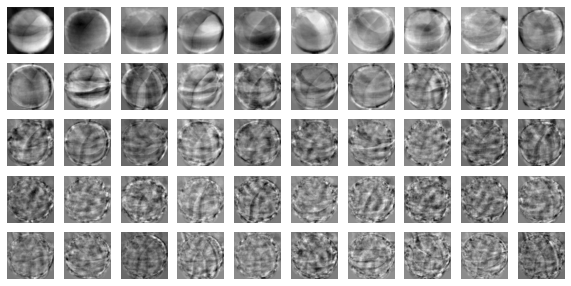

In [18]:
import numpy as np
from sklearn.decomposition import PCA

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

print(pca.components_.shape)

draw_fruits(pca.components_.reshape(-1, 100, 100))
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)








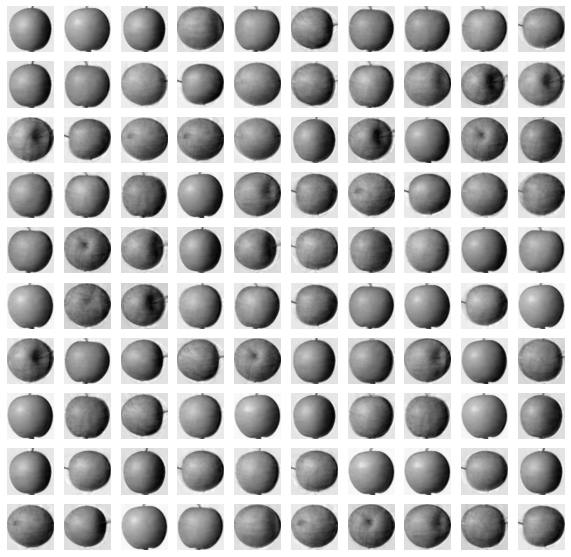

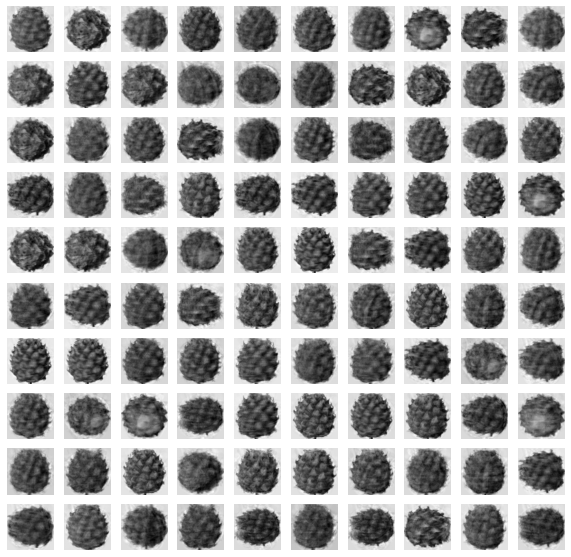

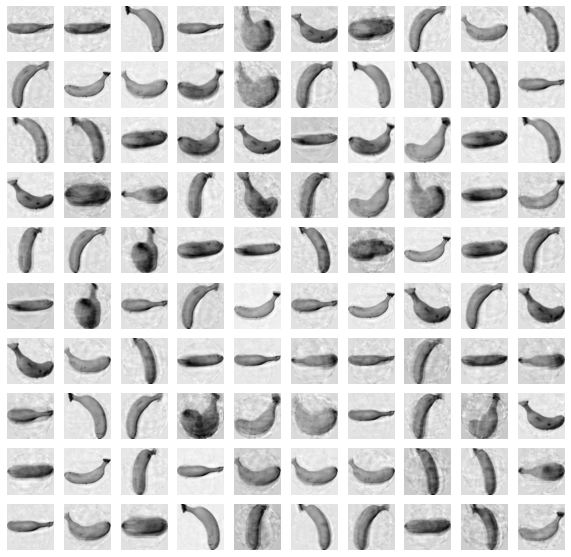

In [20]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511196
 0.00486382 0.00480347 0.00447837 0.00437319 0.00408042 0.00389474
 0.00372428 0.00359288 0.00331468 0.00317836 0.00304332 0.00303734
 0.00288903 0.00275832 0.00264924 0.00255841 0.00252111 0.00247442
 0.00239589 0.00230994 0.00221926 0.00217011 0.00213977 0.00196369
 0.00192446 0.00189048 0.00183389 0.00180403 0.00173078 0.00167241
 0.0016129  0.00158756]
0.9214834678429067


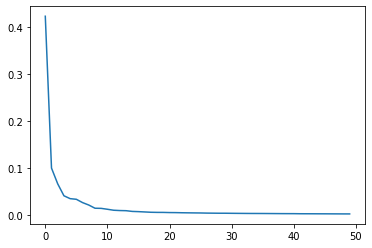

In [23]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7562771320343018
1.0
0.04978017807006836


In [32]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

2
(300, 2)
0.9933333333333334
0.05487680435180664


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


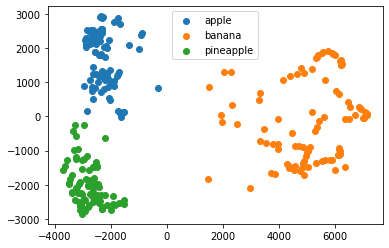

In [44]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=42)
km.fit(fruits_pca) #원본
print(np.unique(km.labels_, return_counts=True))

for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()